# 2.3数据统计描述方法

In [31]:
"""
    Author: <李昌峻>
    Date:    2024/9/19
    Version: 1.0
    Encoding: UTF-8
    Description: 数据挖掘课程2.3代码实现
    Email: changjunli049@gmail.com
"""

'\n    Author: <李昌峻>\n    Date:    2024/9/19\n    Version: 1.0\n    Encoding: UTF-8\n    Description: 数据挖掘课程第二章节代码实现\n    Email: changjunli049@gmail.com\n'

In [40]:
# 可能用到的库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.font_manager import FontProperties # 字体设置
import math
from collections import Counter

In [33]:
# 设置绘图中的中文显示，不设置的话，会出现乱码情况。Windows系统和macOS系统设置方式不同，请注意。
font = FontProperties(fname=r"/System/Library/Fonts/Hiragino Sans GB.ttc", size=14)    # macos 下的字体
# font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)    #  windows

## 2.3.1 数据的中心趋势度量

In [ ]:
# 示例数据
data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

### 1.均值
均值计算包括算术均值及几何均值

Numpy计算数据的均值为: 55.0
数学计算均值: 55.0


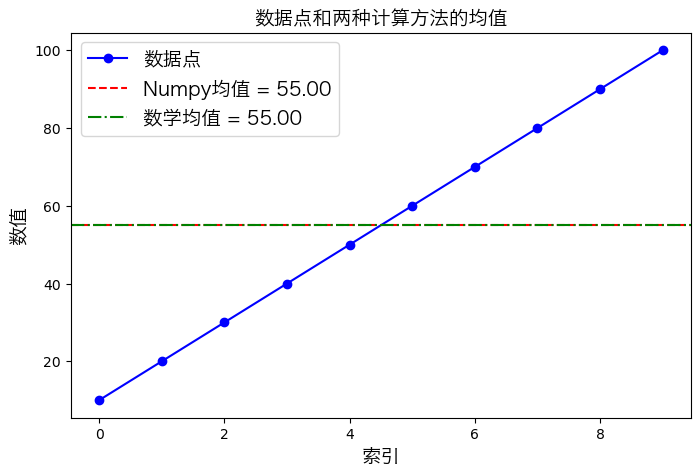

In [34]:
### 1. 算数均值
# 使用numpy库的算数均值实现
def calculate_mean(data):
    """
    Numpy实现
    :param data: list
    :return: float
    """
    if len(data) == 0:
        return None  # 处理空列表的情况
    return np.mean(data)

# 数学原理
def calculate_mean_math(data):
    """
    数学实现
    :param data: list
    :return: float
    """
    if len(data) == 0:
        return None  # 如果数据为空，返回None
    total_sum = sum(data)  # 计算数据的总和
    count = len(data)  # 计算数据的数量
    mean_value = total_sum / count  # 计算均值
    return mean_value

# 示例数据
data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
mean_value = calculate_mean(data)
mean_value_math=calculate_mean_math(data)

print(f"Numpy计算数据的均值为: {mean_value}")
print(f"数学计算均值: {mean_value_math}")

# 图像绘制
plt.figure(figsize=(8, 5))

# 绘制数据点
plt.plot(data, marker='o', label='数据点', color='b')

# 绘制Numpy计算的均值线
plt.axhline(y=mean_value, color='r', linestyle='--', label=f'Numpy均值 = {mean_value:.2f}')

# 绘制数学计算的均值线
plt.axhline(y=mean_value_math, color='g', linestyle='-.', label=f'数学均值 = {mean_value_math:.2f}')

# 图表标题和标签
plt.title('数据点和两种计算方法的均值', fontproperties=font)
plt.xlabel('索引', fontproperties=font)
plt.ylabel('数值', fontproperties=font)
plt.legend(prop=font)
plt.show()

加权均值
$$ \text{加权均值}=\frac{\sum_{i=1}^nx_iw_i}{\sum_{i=1}^nw_i}  $$

In [36]:
### 2.带权重的均值
def calculate_weighted_mean(data, weights):
    """
    计算加权均值
    :param data: list
    :param weights: list
    :return: float
    """
    
    # 对空列表（data和权重，返回0）
    if len(data) == 0 or len(weights) == 0:
        return None  
        
    # 检查数据和权重列表长度是否一致
    if len(data) != len(weights):
        raise ValueError("数据和权重的长度必须相同")  
    
    weighted_sum = 0  # 初始化加权和
    total_weight = 0  # 初始化权重和
    
    # 遍历数据和权重，计算加权和and权重和
    for d, w in zip(data, weights):
        weighted_sum += d * w
        total_weight += w
    
    # 计算加权均值
    weighted_mean = weighted_sum / total_weight
    
    return weighted_mean

# 示例数据
# data同上
weights = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # 假设设置权重

weighted_mean_value = calculate_weighted_mean(data, weights)

print(f"加权均值为: {weighted_mean_value}")

加权均值为: 70.0


### 中位数
均值在数据观测值分布不均匀的情况下，无法有效反应数据的中心。需引入中位数概念 \
两种计算方式：中间数（平均）or 中位数近似值计算 

In [37]:
### 1.中位数（平均）
def calculate_median(data):
    """
    :param data: list
    :return: float
    """
    if len(data) == 0:
        return None  # 如果数据为空，返回None

    # 对数据进行排序
    sorted_data = sorted(data)
    n = len(sorted_data)  # 数据的数量

    # 如果数据量为奇数，返回中间的数
    if n % 2 == 1:
        median = sorted_data[n // 2]
    else:
        # 如果数据量为偶数，返回中间两个数的平均值
        mid1 = sorted_data[n // 2 - 1]
        mid2 = sorted_data[n // 2]
        median = (mid1 + mid2) / 2
    
    return median

# data使用同上数据
# 计算中位数
median_value = calculate_median(data)

print(f"中位数为: {median_value}")

    

中位数为: 55.0


利用插值法求中位数，具体公式：
$$\mathrm{L_1~+(\frac{\frac N2-(\sum freq)_1}{freq_{median}})width}$$
1.确定中位数存在组：$N/2$，$N$是数据总数 \
2.找出中位数区间下界$L1$ \
3.求出低于中位数区间的频率和$(\sum freq)_1$ \
4.中位数区间的频数（频率），即$freq_{median}$ \
5.中位数宽度，$width$

In [38]:
### 2.插值法近似值预测中位数
def calculate_median_interpolation(class_intervals,frequencies):
    """
    :param class_intervals: 元组（列表形式）的数据类型
    :param frequencies: list，表示区间的频率
    :return: float 插值法计算出的中位数
    """
    if len(class_intervals)==0 or len(frequencies)== 0:
        return None
    
    if len(class_intervals) != len(frequencies):
        raise ValueError("区间和对应的频率个数必须相同")
    
    N=sum(frequencies)
    
    # 累计频率
    cumulative_frequencies = [sum(frequencies[:i+1]) for i in range(len(frequencies))]
    
    # 中位数区间
    find_median_class=next(i for i, cf in enumerate(cumulative_frequencies) if cf >= N / 2) 
    """
        enumerate函数：将 cumulative_frequencies列表中的每个元素与其索引配对，生成一个 (index, value) 的迭代器
        i为当前元素索引
        cf临时设立中间量，表示cumulative_frequencies的值
        遍历累积频率列表，找到第一个累积频率值大于或等于总样本数的一半的位置
        这个索引，对应的位置就是包含中位数的区间
    """
    
    
    L = class_intervals[find_median_class][0]  # 区间的下界
    f = frequencies[find_median_class]  # 中位数区间的频率
    F = cumulative_frequencies[find_median_class - 1] if find_median_class > 0 else 0  # 中位数区间之前的累积频率
    w = class_intervals[find_median_class][1] - class_intervals[find_median_class][0]  # 区间的宽度
    
    # 使用插值公式计算中位数
    median = L + ((N / 2 - F) / f) * w
    
    return median
    
# 区间和对应的频率
class_intervals = [(10, 20), (20, 30), (30, 40), (40, 50)]
frequencies = [5, 15, 30, 10]  # 频率

median_value = calculate_median_interpolation(class_intervals, frequencies)

print(f"插值法计算的中位数为: {median_value}")

插值法计算的中位数为: 33.333333333333336


### 3.众数


In [42]:
def calculate_mode(data):
    """
    !!! tips:mode 熟词生意：众数
    :param data: list, 数据列表
    :return: list, 众数列表
    """
    if len(data) == 0:
        return None  # 如果数据为空，返回None
    
    # 计算数据的频率
    count = Counter(data)
    
    # 最大出现
    max_count = max(count.values())
    
    # 所有出现次数等于最大出现次数的值
    mode = [key for key, value in count.items() if value == max_count]
    
    return mode

# 示例数据
data_mode = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

mode_values = calculate_mode(data_mode)

print(f"众数为: {mode_values}")

众数为: [4]


### 4.中列数
数据集最大值和最小值的平均值

In [45]:
def calculate_midrange(data):
    """
    :param data: list, 数据列表
    :return: float, 最大值和最小值的平均值
    """
    if len(data) == 0:
        return None  
    
    max_value = max(data)  
    min_value = min(data)  
    
    average = (max_value + min_value) / 2  # 计算平均值
    
    return average


# 计算最大值和最小值的平均值
midrange = calculate_midrange(data)

print(f"最大值和最小值的平均值(中列数)为: {midrange}")

最大值和最小值的平均值(中列数)为: 55.0


## 2.3.2 数据的离散趋势度量

### 1.极差与分位数

In [46]:
### 1.极差
def calculate_range(data):
    """
    :param data: list, 数据列表
    :return: float, 数据集的极差
    """
    if len(data) == 0:
        return None  
    
    max_value = max(data)  
    min_value = min(data)  
    
    range_value = max_value - min_value  
    
    return range_value


# 计算极差
range_value = calculate_range(data)

print(f"数据集的极差为: {range_value}")

数据集的极差为: 90


Q1: 32.5, Q3: 77.5
数据集的四分位数极差为: 45.0


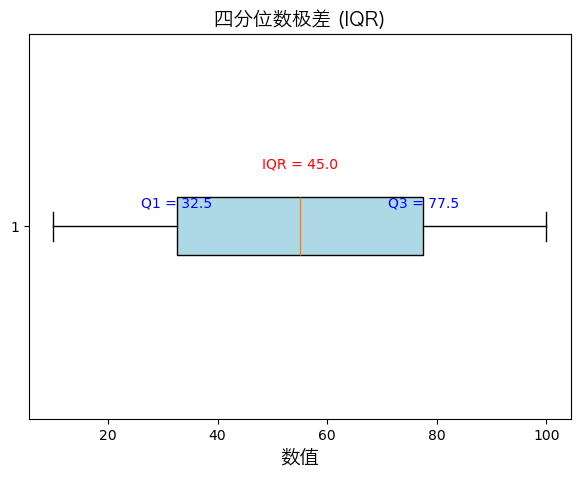

In [61]:
### 2.分位数中的分位数极差（IQR），以书上为例
def calculate_percentile(data, percentile):
    """
    计算给定数据集的指定百分位数
    :param data: list, 数据列表
    :param percentile: float, 百分位数
    :return: float, 对应的百分位数值
    """
    data = sorted(data) # 排序
    n = len(data) 
    
    # 计算位置索引 (百分位数对应)
    k = (n - 1) * (percentile / 100)
    f = int(k)  # 向下取整
    c = k - f   # 小数部分，用于插值计算
    
    # 如果百分位数位置是整数，直接返回对应的数值
    if f == k:
        return data[f]
    else:
        # 对小数部分差值计算
        return data[f] + (data[f + 1] - data[f]) * c


def calculate_iqr(data):
    """
    计算数据集的四分位数极差 (IQR)
    :param data: list, 数据列表
    :return: float, 四分位数极差
    """
    if len(data) == 0:
        return None  # 处理空数据列表的情况
    
    # 使用 numpy
    # Q1 = np.percentile(data, 25)  # 25%分位数
    # Q3 = np.percentile(data, 75)  # 75%分位数
    
    # 数学计算（不用numpy）
    Q1 = calculate_percentile(data, 25)  # 25%分位数
    Q3 = calculate_percentile(data, 75)  # 75%分位数
    
    
    # 计算四分位数极差
    IQR = Q3 - Q1
    
    return Q1,Q3,IQR

Q1,Q3,IQR = calculate_iqr(data)

print(f"Q1: {Q1}, Q3: {Q3}")
print(f"数据集的四分位数极差为: {IQR}")

# 绘制箱线图（盒图）
plt.figure(figsize=(7, 5))
plt.boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# 标注 Q1 和 Q3
plt.text(Q1, 1.05, f'Q1 = {Q1}', horizontalalignment='center', color='blue')
plt.text(Q3, 1.05, f'Q3 = {Q3}', horizontalalignment='center', color='blue')

# 标注 IQR
plt.text((Q1 + Q3) / 2, 1.15, f'IQR = {IQR}', horizontalalignment='center', color='red')

plt.title('四分位数极差 (IQR)',fontproperties=font)
plt.xlabel('数值', fontproperties=font)
plt.show()

### 2.五数概括与图像绘制
五数包括中位数、四分位数（Q1,Q3）、最大观测值，最小观测值(两个观测值不是单纯的最大和最小值）

In [59]:
def calculate_max_min_observe(data,Q1,Q3,IQR):
    """
    :param data: list, 数据列表
    :return: tuple
    """
    if len(data) == 0:
        return None, None  
    
    min=Q1-1.5*IQR
    max=Q3+1.5*IQR
    
    return max, min

max,min=calculate_max_min_observe(data,Q1,Q3,IQR)
print(data)
print(f"最大观测值: {max}")
print(f"最小观测值: {min}")

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
最大观测值: 145.0
最小观测值: -35.0


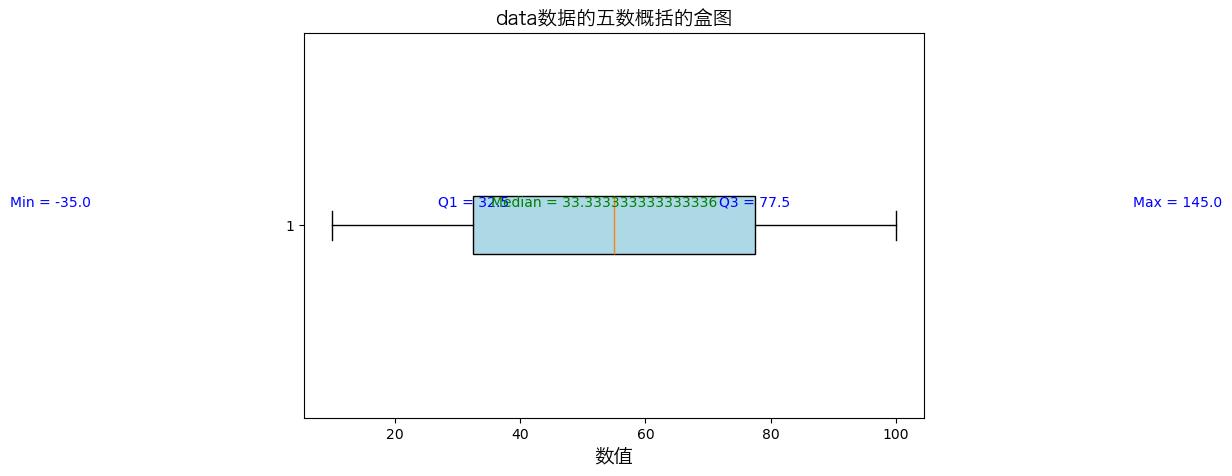

In [80]:
# 绘制盒图
plt.figure(figsize=(8, 5))
plt.boxplot(data, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# 标注五数
plt.text(min, 1.05, f'Min = {min}', horizontalalignment='center', color='blue')
plt.text(Q1, 1.05, f'Q1 = {Q1}', horizontalalignment='center', color='blue')
plt.text(median_value+20, 1.05, f'Median = {median_value}', horizontalalignment='center', color='green') # 设置偏移量，防止图例重合
plt.text(Q3, 1.05, f'Q3 = {Q3}', horizontalalignment='center', color='blue')
plt.text(max, 1.05, f'Max = {max}', horizontalalignment='center', color='blue')

# 设置图表标题和标签
plt.title('data数据的五数概括的盒图',fontproperties=font)
plt.xlabel('数值',fontproperties=font)

# 显示图表
plt.show()

### 3.方差和标准差
方差计算公式：$$\sigma^2=\frac{\sum_{i=1}^N\left(x_i-\mu\right)^2}N=\frac{\sum_{i=1}^Nx_i^2}N-\mu^2$$

标准差计算公式：$$\sigma=\sqrt{\sigma^2}=\sqrt{\frac{\sum_{i=1}^N{(x_i-\mu)^2}}N}$$

In [81]:
###1.方差计算
def calculate_variance(data):
    """
    :param data: list, 数据列表
    :return: float, 方差
    """
    if len(data) == 0:
        return None 

    mean_value = calculate_mean_math(data)  # 计算均值
    # mean_value = calculate_mean(data) 
    squared_diffs = [(x - mean_value) ** 2 for x in data]  # 每个数据点与均值的差的平方
    variance = sum(squared_diffs) / len(data) 
    return variance

variance = calculate_variance(data)
print(f"data的方差为：{variance}")


data的方差为：825.0


In [82]:
### 2.标准差
def calculate_std_dev(data):
    variance=calculate_variance(data)
    return math.sqrt(variance)

std_dev = calculate_std_dev(data)
print(f"data的标准差为：{std_dev}")

data的标准差为：28.722813232690143
